# Read data from CSV

In [1]:
import sys, os
from pathlib import Path
sys.path.append(str(Path("..")))
from scripts.read_data import read_data

os.makedirs("../generated_charts", exist_ok = True)

data = read_data()
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numeric_data = data.select_dtypes(include="number")
numeric_data = StandardScaler().fit_transform(numeric_data)

pca = PCA(n_components = 2)

principal_components = pca.fit_transform(numeric_data)

principal_components_dataframe = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

principal_components_dataframe

,principal component 1,principal component 2
0,-5.451395,-0.838849
1,0.094267,1.944246
2,-3.609145,-1.427861
3,0.299871,0.602556
4,0.167675,-0.338505
...,...,...
4419,0.029082,0.545343
4420,-0.634618,0.600618
4421,0.570020,0.953020
4422,-0.625173,1.944089


In [3]:
result_pca = pd.concat([principal_components_dataframe, data["Target"]], axis = 1)
result_pca

,principal component 1,principal component 2,Target
0,-5.451395,-0.838849,Dropout
1,0.094267,1.944246,Graduate
2,-3.609145,-1.427861,Dropout
3,0.299871,0.602556,Graduate
4,0.167675,-0.338505,Graduate
...,...,...,...
4419,0.029082,0.545343,Graduate
4420,-0.634618,0.600618,Dropout
4421,0.570020,0.953020,Dropout
4422,-0.625173,1.944089,Graduate


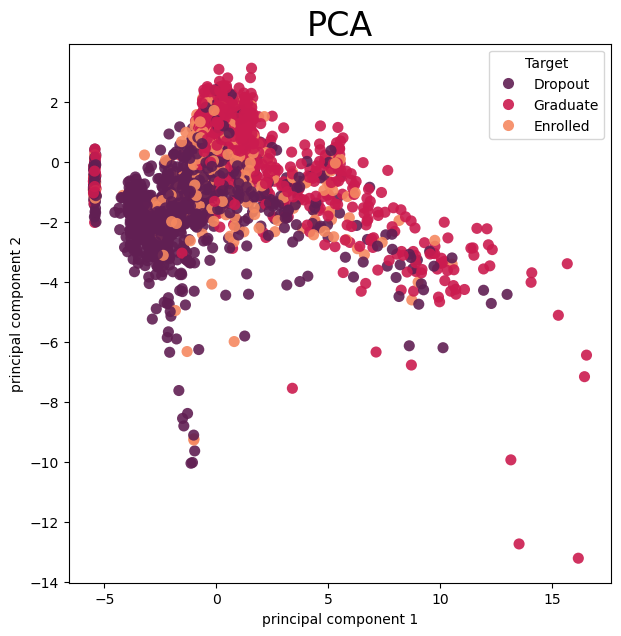

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

sns.scatterplot(
    data = result_pca, 
    x = "principal component 1", 
    y = "principal component 2", 
    hue = "Target", 
    palette="rocket",
    edgecolor='none',
    alpha = 0.9,
    s = 64
)

plt.title("PCA", fontsize = 24)
plt.legend(title = "Target")
plt.savefig("../generated_charts/PCA.png", dpi = 300, bbox_inches = "tight")
plt.show()